#### Lecture 4: Fourier Transforms in 1D

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

font = {'weight' : 'normal',
        'size'   : 20}

# Definition of the Fourier Transform
The Fourier Transform (FT) for a continuous signal $f(x)$ is defined as follows:
$$\hat{f}(u) = \int_{-\infty}^{\infty} f(x) e^{-i 2 \pi x u} dx$$
Generally, this FT operation can be viewed as expressing a time-domain signal (if the variable $x$ corresponds to time) in terms of its temporal frequency components, or a spatial-domain signal in terms of its spatial frequency components. 


# Definition of the inverse Fourier Transform

The inverse Fourier Transform (iFT) can be expressed as follows: 
$$f(x) = \int_{-\infty}^{\infty} \hat{f}(u)  e^{i 2 \pi x u} d u$$
which is essentially the same expression as the FT, except the sign on the exponential is flipped. 
The signals $f(x)$ and $\hat{f}(u)$ are referred to as a Fourier Transform pair. 


# What signals can we represent using the Fourier Transform? 

### Let's think about signals that are easy to decompose into sines and cosines (ie: complex exponentials of different frequencies)


### Let's think about signals that are difficult to decompose into sines and cosines (ie: complex exponentials of different frequencies)



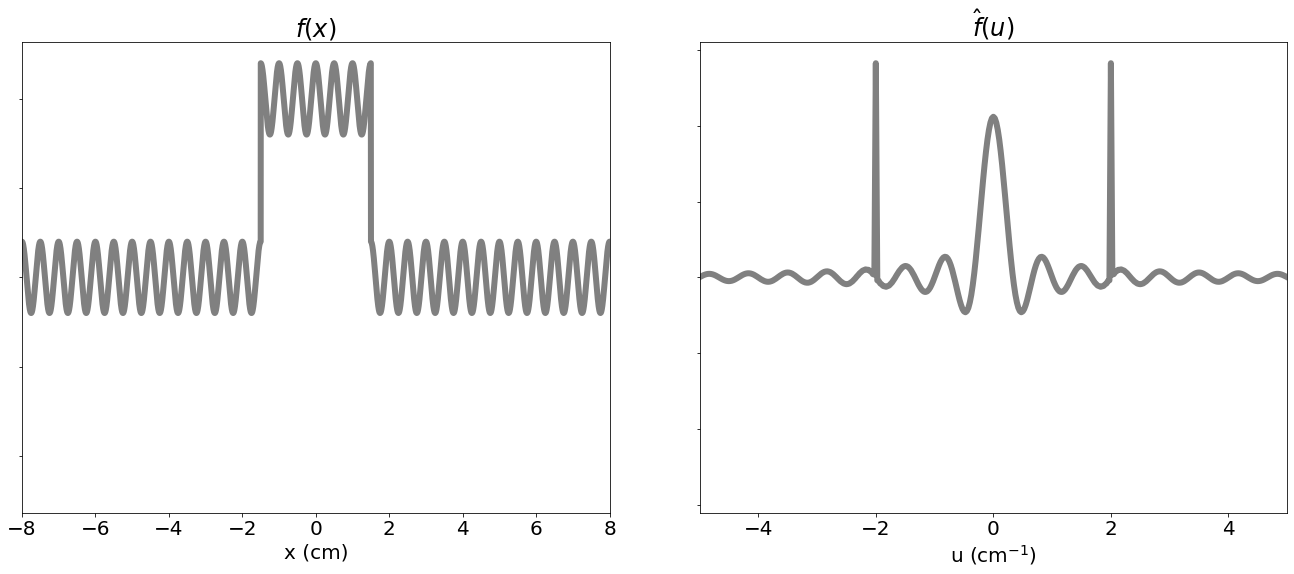

In [66]:
# Let's plot a signal and its FT
N = 20001
xmax = 20
x = np.linspace(-xmax,xmax,N)
dx = x[1] - x[0]
f = 1.0*(np.abs(x)<1.5)
f = np.cos(2*np.pi*0.6*x)
f = 1.0*(np.abs(x)<1.5) + 0.2*np.cos(2*np.pi*2*x)


# Calculate a (discrete) Fourier transform
umax = 1/(2*dx)
u = np.linspace(-umax,umax,N)
fhat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))/np.sqrt(len(f))


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=4.0)


# How to filter out noise/unwanted signals at specific frequencies? 

Suppose we have a signal with some desired features, plus some unwanted signal at specific frequencies - how to remove the unwanted signal? 


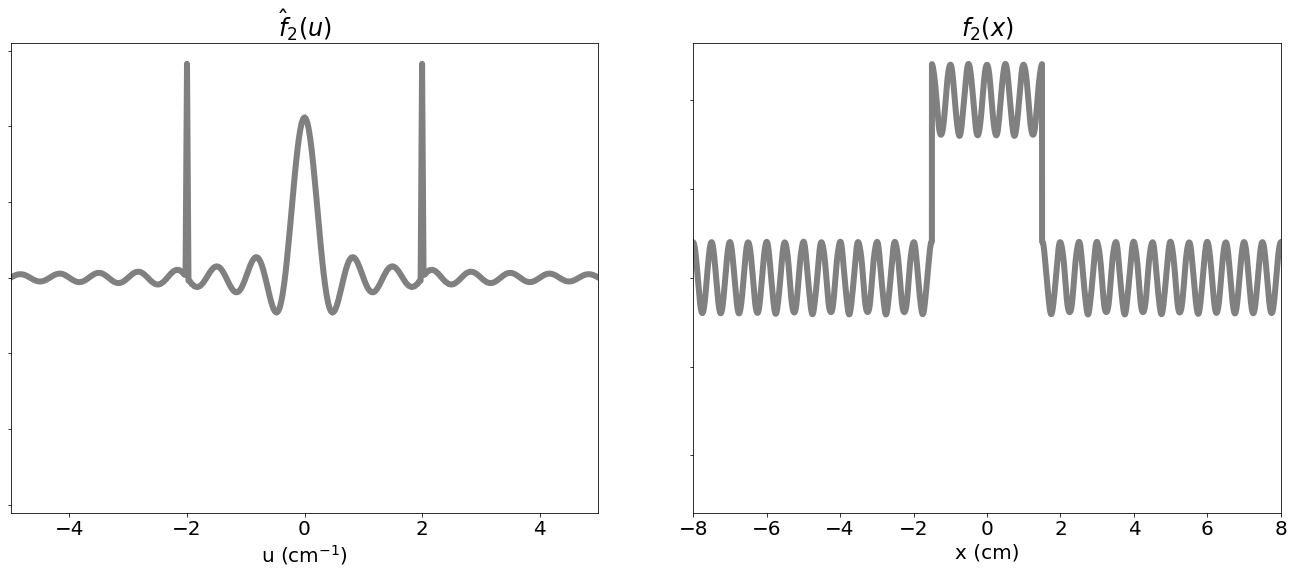

In [76]:
# Remove unwanted signal
u0 = 7 # Frequency to remove (both positive and negative frequency will be removed)
urange = 0.1 # Width of frequency range to remove
fhat2 = fhat.copy() # Make a copy of our signal's Fourier Transform
fhat2[abs(abs(u)-u0)<urange] = 0 # Zero-out the desired frequency ranges
f2 = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat2)))*np.sqrt(len(f)) # Go back to spatial domain


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(u,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title('$\hat{f}_2(u)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_2(x)$')
plt.xlabel('x (cm)')
plt.tight_layout(pad=4.0)


